# Import Necessary Library

In [1]:
import json
import nltk

!pip install nlp_utils
import pandas as pd
import numpy as np
import torch
import pickle
import tqdm
import random

from collections import Counter

import string
string.punctuation
!pip install langid
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
#nltk.download('punkt')
#nltk.download('stopwords')

!pip install stop-words
!pip install stop-words

from stop_words import get_stop_words

#!pip install googletrans==4.0.0-rc1
!pip install indic-transliteration
from indic_transliteration import sanscript

# Define the source and target scripts
source_script = sanscript.DEVANAGARI
target_script = sanscript.ITRANS

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.naive_bayes import MultinomialNB

# Open the JSON file

In [3]:
# Open and parse the Training JSON file
with open('.//MaSaC_train_erc.json', 'r') as json_file:
    train_data = json.load(json_file)

In [4]:
train_data[0]

{'episode': 'roseshantstobeadopted.wmv',
 'speakers': ['maya',
  'indu',
  'rosesh',
  'indu',
  'maya',
  'indu',
  'rosesh',
  'indu',
  'sahil',
  'rosesh',
  'maya',
  'indu',
  'sahil',
  'monish',
  'maya',
  'indu',
  'maya',
  'indu',
  'indu',
  'maya',
  'rosesh',
  'maya'],
 'utterances': ['kya kya bhar ke rakha hai indravadan ne is ghar mein indravadan please tum sari bekar ki chijen bahar kyon nahin fekte?',
  'ok, chalo rosesh chalo bahar',
  'momma! hath chhodiye dad!',
  'dekho maya ya na bol raha hai! fir tum hi kahogi faltu chijen jama karte ho fekte nahin ho, chalo',
  'indravadan, tum kitne salo se ye joke maar rahe ho. koi hota hai aaj tak?',
  'kaikai pe joke maroge to manthra thodi na hasegi',
  'very funny',
  'maya, monisha aur sahil aa rahe hain, dekhna yahi jo un per istemal karta hun aur dekhna vah kitna haste hain',
  'hi guys',
  'hi',
  'hi darling. achcha indravadan, please ya kachra bahar fenko!',
  'ok maya, chalo rosesh tumhen bahar fenk au',
  'mom! 

In [5]:
# Open and parse the validation JSON file
with open('.//MaSaC_val_erc.json', 'r') as json_file:
    validation_data = json.load(json_file)

In [6]:
validation_data[0]

{'episode': 'roseshantstobeadopted.wmv',
 'speakers': ['good rosesh',
  'bad rosesh',
  'good rosesh',
  'bad rosesh',
  'good rosesh',
  'bad rosesh',
  'good rosesh',
  'bad rosesh',
  'good rosesh',
  'rosesh',
  'rosesh',
  'maya',
  'rosesh'],
 'utterances': ['ye kya kar raha hai rosesh? bharat tera desh! bhartiya insan hai saccha. kisi ka khat padhna nahin hai achcha.',
  'hahaha khat padh le rosesh baby or padhne de hamen bhi. kitna achcha lagta hai balon mein gel, ding dong bell.',
  'kavita acchi hai lekin khayal achcha nahin hai, villain rosesh. momma ne kaha hai kisi aur ka khat padhna galat baat hai',
  'galat hai, par momma ne tumse kaha tha ki do bar brush karna aur tumne sirf ek bar kiya tha kya vah galat nahin tha?',
  'galat tha per',
  'momma ne tumse jab green chatni mangi thi aur tumne red pass ki thi kya vah galat nahin tha?',
  'wo to galat tha',
  'pichhle sal momma ki nayi hair style ostrich jesi thi aur tumne unhen apsara kaha tha kya vah galat nahin tha?',
  '

# Total number of episode in Training Data

In [7]:
# Create a list to store  episode names
total_episodes_1 = []

for conversation in train_data:
    episode = conversation["episode"]

    # Add the episode name to the set of unique episodes
    total_episodes_1.append(episode)


# Print the total number of  conversation topics or episodes
print("Total episode topics:", len(total_episodes_1))

Total episode topics: 343


# Distinct Episode name in Training coversation

In [8]:
# Convert the list of episode names to a set to get unique episodes
unique_episodes_1 = set(total_episodes_1)

# Print the unique episode names
print("Unique episode names:", unique_episodes_1)

# Print the total number of unique episodes
print("Total unique episodes:", len(unique_episodes_1))

Unique episode names: {'doggy', 'bachlorparty', 'introductiontothesarabhaifamily.avi', 'roseshpoetrypublication.wmv', 'sahillovestory.wmv', 'neelimaverma.wmv', 'mayabetmonisha.wmv', 'cricket.wmv', 'newcar', 'yamraj.wmv', 'mayaleavesindravardhan.wmv', 'scrabblecompetition.avi', 'monishacomplainsofsahil.wmv', 'mayamonishabday.avi', 'mayanighmare', 'jaspal.wmv', 'prefinale', 'african', 'patang', 'indravadanmissing.avi', 'election', 'mayaleavesindravardhan(1) (1).wmv', 'radhabaileaves', 'monishasspeechonmaya.wmv', 'bachelor.wmv', 'roseshaccident', 'jugalkishore.wmv', 'lease2.wmv', 'baldev', 'video1.wmv', 'mayaonacleaningdrive.wmv', 'dushyant', 'sharman.wmw', 'khilawal.wmv', 'prankonindravadhan', 'mayadoubtsindravardhan.wmv', 'roseshnayadon.wmv', 'finale.avi', 'lease1.wmv', 'roseshmarriesrita.wmw', 'playatcharityfunction', 'monishasuicideattempt.wmv', 'sahilmarriesmonisha.wmv', 'kavi.wmv', 'popatlal', 'monishaadaptstohighsociety', 'soniyaprediction.avi', 'husbandsdonotcheat.avi', 'roseshant

In [9]:
total_episodes_1

episode_counts = {}

for episode_title in total_episodes_1:
    episode_counts[episode_title] = episode_counts.get(episode_title, 0) + 1

for title, count in episode_counts.items():
    print(f"{title} occurs {count} times")

roseshantstobeadopted.wmv occurs 5 times
video1.wmv occurs 8 times
yamraj.wmv occurs 7 times
finale.avi occurs 13 times
indravadanmissing.avi occurs 7 times
sharman.wmw occurs 6 times
soniyaprediction.avi occurs 7 times
bachelor.wmv occurs 7 times
cricket.wmv occurs 8 times
husbandsdonotcheat.avi occurs 11 times
introductiontothesarabhaifamily.avi occurs 6 times
jugalkishore.wmv occurs 8 times
kavi.wmv occurs 4 times
lease1.wmv occurs 8 times
lease2.wmv occurs 7 times
mayaleavesindravardhan(1) (1).wmv occurs 6 times
mayadoubtsindravardhan.wmv occurs 6 times
jaspal.wmv occurs 5 times
khilawal.wmv occurs 4 times
mayabetmonisha.wmv occurs 10 times
mayaleavesindravardhan.wmv occurs 6 times
mayamonishabday.avi occurs 6 times
mayanighmare occurs 5 times
mayaonacleaningdrive.wmv occurs 9 times
monishaadaptstohighsociety occurs 6 times
roseshnayadon.wmv occurs 5 times
roseshmarriesrita.wmw occurs 6 times
roseshpoetrypublication.wmv occurs 6 times
sahillovestory.wmv occurs 5 times
sahilmarriesm

In [10]:
import pandas as pd


# Create an empty list to store the data for each conversation
conversation_data = []

# Iterate through the JSON data and construct a DataFrame for each conversation
for conversation in train_data:
    episode = conversation["episode"]
    speakers = conversation["speakers"]
    utterances = conversation["utterances"]
    emotions = conversation["emotions"]

    # Create a DataFrame for the current conversation
    df = pd.DataFrame({
        "Episode": [episode] * len(speakers),
        "Speakers": speakers,
        "Utterances": utterances,
        "Emotions": emotions
    })

    # Append the DataFrame to the list
    conversation_data.append(df)

# Concatenate all conversation DataFrames into one DataFrame
train_df = pd.concat(conversation_data, ignore_index=True)
train_df.head(5)

,Episode,Speakers,Utterances,Emotions
0,roseshantstobeadopted.wmv,maya,kya kya bhar ke rakha hai indravadan ne is gha...,disgust
1,roseshantstobeadopted.wmv,indu,"ok, chalo rosesh chalo bahar",contempt
2,roseshantstobeadopted.wmv,rosesh,momma! hath chhodiye dad!,anger
3,roseshantstobeadopted.wmv,indu,dekho maya ya na bol raha hai! fir tum hi kaho...,neutral
4,roseshantstobeadopted.wmv,maya,"indravadan, tum kitne salo se ye joke maar rah...",neutral


In [11]:
#validation_data

In [12]:
import pandas as pd


# Create an empty list to store the data for each conversation
conversation_data = []

# Iterate through the JSON data and construct a DataFrame for each conversation
for conversation in validation_data:
    episode = conversation["episode"]
    speakers = conversation["speakers"]
    utterances = conversation["utterances"]
    emotions = conversation["emotions"]

    # Create a DataFrame for the current conversation
    df = pd.DataFrame({
        "Episode": [episode] * len(speakers),
        "Speakers": speakers,
        "Utterances": utterances,
        "Emotions": emotions
    })

    # Append the DataFrame to the list
    conversation_data.append(df)

# Concatenate all conversation DataFrames into one DataFrame
val_df = pd.concat(conversation_data, ignore_index=True)
val_df.head(5)

,Episode,Speakers,Utterances,Emotions
0,roseshantstobeadopted.wmv,good rosesh,ye kya kar raha hai rosesh? bharat tera desh! ...,neutral
1,roseshantstobeadopted.wmv,bad rosesh,hahaha khat padh le rosesh baby or padhne de h...,neutral
2,roseshantstobeadopted.wmv,good rosesh,kavita acchi hai lekin khayal achcha nahin hai...,neutral
3,roseshantstobeadopted.wmv,bad rosesh,"galat hai, par momma ne tumse kaha tha ki do b...",contempt
4,roseshantstobeadopted.wmv,good rosesh,galat tha per,neutral


In [13]:
# Find distinct emotions
distinct_emotions = train_df['Emotions'].unique()

# Print distinct emotions
print("Distinct Emotions:")
for emotion in distinct_emotions:
    print(emotion)

Distinct Emotions:
disgust
contempt
anger
neutral
joy
sadness
fear
surprise


In [14]:
# Find distinct emotions
distinct_emotions = val_df['Emotions'].unique()

# Print distinct emotions
print("Distinct Emotions:")
for emotion in distinct_emotions:
    print(emotion)

Distinct Emotions:
neutral
contempt
sadness
fear
joy
surprise
anger
disgust


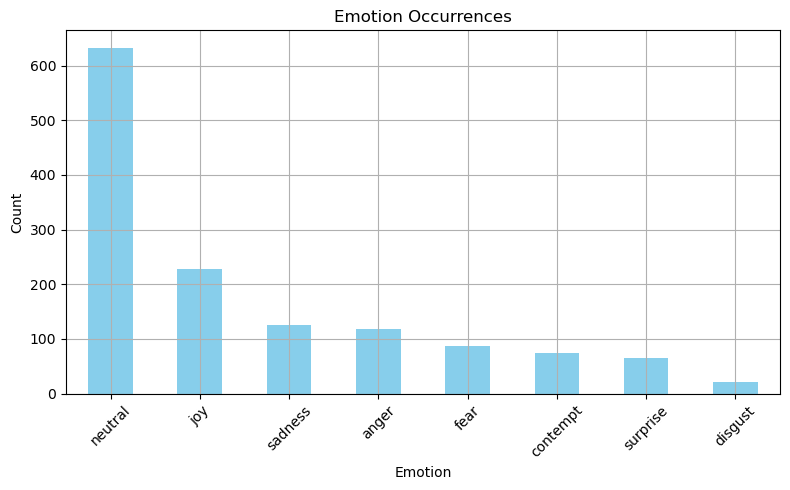

In [15]:
# Count the occurrences of each emotion
emotion_counts = val_df['Emotions'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 5))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Emotion Occurrences')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.savefig("/home/sysadm/validation_emotion.png")
# Show the plot
plt.show()

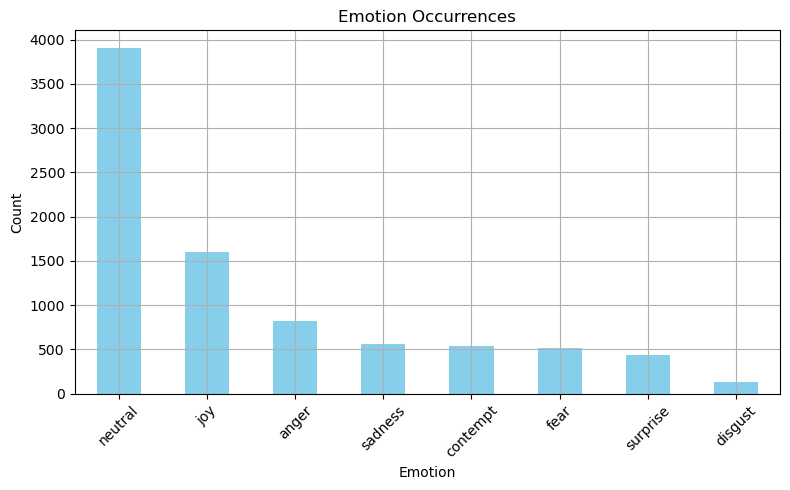

In [16]:
# Count the occurrences of each emotion
emotion_counts = train_df['Emotions'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 5))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Emotion Occurrences')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
# Show the plot
plt.show()

In [17]:
hindi_stopwords = get_stop_words('hi')  # 'hi' is the ISO 639-1 code for Hindi
hindi_stopwords

# Transliterate Hindi to Roman script (English characters)
transliterated_text = [sanscript.transliterate(word, source_script, target_script) for word in hindi_stopwords]

# Convert transliterated words to lowercase
lowercase_transliterated_text = [word.lower() for word in transliterated_text]


# combined list of stopwords for both English and Hindi

In [18]:
english_stopwords = set(stopwords.words('english'))
stop_words = set(english_stopwords)  # English stopwords

# Add Hindi stopwords to the set
hindi_stop_words = set(lowercase_transliterated_text)  # Add your Hindi stopwords here

stop_words.update(hindi_stop_words)
#stop_words

# Preprocessing code for each utterance

In [19]:
import re

def remove_numeric_sequences_and_ordinals(text):
    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove ordinal numbers
    text = re.sub(r'\b\d+(st|nd|rd|th)\b', '', text)

    return text

In [20]:
def remove_puntuations(txt):
    punct = set(string.punctuation)
    txt = " ".join(txt.split("."))
    txt = " ".join(txt.split("!"))
    txt = " ".join(txt.split("?"))
    txt = " ".join(txt.split(":"))
    txt = " ".join(txt.split(";"))
    
    txt = "".join(ch for ch in txt if ch not in punct)
    return txt

In [21]:
# Function clean text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    #remove numeric and ordinals 
    text = remove_numeric_sequences_and_ordinals(text)

    # Remove punctuation
    text = remove_puntuations(text)

    # Remove extra white spaces
    text = ' '.join(text.split())

    # Remove stopwords
    total_stop_words = stop_words
    text = ' '.join([word for word in text.split() if word not in total_stop_words])

    return text

In [22]:
preprocess_text('kya kya bhar ke rakha hai indravadan ne is gha...')

'kya kya bhar rakha indravadan gha'

In [23]:
# Apply preprocessing to the 'Utterances' column
train_df['Clean_text'] = train_df['Utterances'].apply(preprocess_text)

# Print the first few rows of the modified DataFrame
train_df

,Episode,Speakers,Utterances,Emotions,Clean_text
0,roseshantstobeadopted.wmv,maya,kya kya bhar ke rakha hai indravadan ne is gha...,disgust,kya kya bhar rakha indravadan ghar mein indrav...
1,roseshantstobeadopted.wmv,indu,"ok, chalo rosesh chalo bahar",contempt,ok chalo rosesh chalo bahar
2,roseshantstobeadopted.wmv,rosesh,momma! hath chhodiye dad!,anger,momma hath chhodiye dad
3,roseshantstobeadopted.wmv,indu,dekho maya ya na bol raha hai! fir tum hi kaho...,neutral,dekho maya bol fir tum kahogi faltu chijen jam...
4,roseshantstobeadopted.wmv,maya,"indravadan, tum kitne salo se ye joke maar rah...",neutral,indravadan tum kitne salo joke maar aaj tak
...,...,...,...,...,...
8501,radhabaileaves,rosesh,lekin what about my ghadi? 17000 ki ghadi hai ...,sadness,lekin ghadi ghadi momma recurring alarm baje a...
8502,radhabaileaves,sita or geeta,"nhi nhi mujhe yahan pe kaamich nhi karna hai, ...",anger,nhi nhi mujhe yahan kaamich nhi karna jaa rhi hun
8503,radhabaileaves,maya,ahan!,joy,ahan
8504,radhabaileaves,sita or geeta,goodbye!,fear,goodbye


In [24]:
# Apply preprocessing to the 'Utterances' column
val_df['Clean_text'] = val_df['Utterances'].apply(preprocess_text)

# Print the first few rows of the modified DataFrame
val_df

,Episode,Speakers,Utterances,Emotions,Clean_text
0,roseshantstobeadopted.wmv,good rosesh,ye kya kar raha hai rosesh? bharat tera desh! ...,neutral,kya kar rosesh bharat tera desh bhartiya insan...
1,roseshantstobeadopted.wmv,bad rosesh,hahaha khat padh le rosesh baby or padhne de h...,neutral,hahaha khat padh le rosesh baby padhne de hame...
2,roseshantstobeadopted.wmv,good rosesh,kavita acchi hai lekin khayal achcha nahin hai...,neutral,kavita acchi lekin khayal achcha nahin villain...
3,roseshantstobeadopted.wmv,bad rosesh,"galat hai, par momma ne tumse kaha tha ki do b...",contempt,galat par momma tumse bar brush karna aur tumn...
4,roseshantstobeadopted.wmv,good rosesh,galat tha per,neutral,galat per
...,...,...,...,...,...
1349,prefinale,monish,sahil sahil sahil. sirf 4 din bache hai or sar...,fear,sahil sahil sahil sirf din bache sari ladkiyan...
1350,prefinale,sahil,haan lekin mom unn charo me se kisi ek ko fina...,neutral,haan lekin mom unn charo ek finalise kar lengi
1351,prefinale,monish,mummy ji ko to unme se koi pasand nhi hai,sadness,mummy ji unme pasand nhi
1352,prefinale,sahil,rosesh ko?,neutral,rosesh


In [25]:
train = train_df[["Emotions","Clean_text"]]
train

,Emotions,Clean_text
0,disgust,kya kya bhar rakha indravadan ghar mein indrav...
1,contempt,ok chalo rosesh chalo bahar
2,anger,momma hath chhodiye dad
3,neutral,dekho maya bol fir tum kahogi faltu chijen jam...
4,neutral,indravadan tum kitne salo joke maar aaj tak
...,...,...
8501,sadness,lekin ghadi ghadi momma recurring alarm baje a...
8502,anger,nhi nhi mujhe yahan kaamich nhi karna jaa rhi hun
8503,joy,ahan
8504,fear,goodbye


In [26]:
# Assuming train is the DataFrame containing the 'Clean_text' column
max_words = train['Clean_text'].apply(lambda x: len(x.split())).max()
print(f"The maximum number of words in an utterance is: {max_words}")

The maximum number of words in an utterance is: 94


In [27]:
# Assuming 'train' is the DataFrame containing the 'Clean_text' column
max_words_index = train['Clean_text'].apply(lambda x: len(x.split())).idxmax()
print(f"The index number of the row with the maximum number of words: {max_words_index}")

The index number of the row with the maximum number of words: 2315


In [28]:
train["Clean_text"][2315]

'khar khar khar khar chale cinema reel cinema parde par aaya sushil sushil acting uske muscles kartein hain cehera hain blank mara kabootar dailogue bole lagta hain bigda hain padooshi scooter sushil heroine sandhya kapde jitne taklu saar par hoon baal aage suniyega sandhya acche dete hain chipkaali expression sandhya acche deti hain chipkali expression lekin phirbhi sandhya banega best actress iss saal sushil muscles milega award kyuki uske papa hain jury par samjhe picture deenge start critics kyuki wo hain producers chaamche phir main jaa kar dekhte hoon kyu kyu main dard hain'

In [29]:
validation = val_df[["Emotions","Clean_text"]]

In [30]:
train

,Emotions,Clean_text
0,disgust,kya kya bhar rakha indravadan ghar mein indrav...
1,contempt,ok chalo rosesh chalo bahar
2,anger,momma hath chhodiye dad
3,neutral,dekho maya bol fir tum kahogi faltu chijen jam...
4,neutral,indravadan tum kitne salo joke maar aaj tak
...,...,...
8501,sadness,lekin ghadi ghadi momma recurring alarm baje a...
8502,anger,nhi nhi mujhe yahan kaamich nhi karna jaa rhi hun
8503,joy,ahan
8504,fear,goodbye


In [31]:
validation

,Emotions,Clean_text
0,neutral,kya kar rosesh bharat tera desh bhartiya insan...
1,neutral,hahaha khat padh le rosesh baby padhne de hame...
2,neutral,kavita acchi lekin khayal achcha nahin villain...
3,contempt,galat par momma tumse bar brush karna aur tumn...
4,neutral,galat per
...,...,...
1349,fear,sahil sahil sahil sirf din bache sari ladkiyan...
1350,neutral,haan lekin mom unn charo ek finalise kar lengi
1351,sadness,mummy ji unme pasand nhi
1352,neutral,rosesh


In [32]:
possible_label = train.Emotions.unique()
dict_label = {}
for index,possible_label in enumerate(possible_label):
    dict_label[possible_label] = index
dict_label

{'disgust': 0,
 'contempt': 1,
 'anger': 2,
 'neutral': 3,
 'joy': 4,
 'sadness': 5,
 'fear': 6,
 'surprise': 7}

In [33]:
# possible_label = validation.Emotions.unique()
# dict_label = {}
# for index,possible_label in enumerate(possible_label):
#     dict_label[possible_label] = index
# dict_label

In [34]:
train["Label"] = train["Emotions"].replace(dict_label)
train.head()

/tmp/ipykernel_52466/2033087932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Label"] = train["Emotions"].replace(dict_label)


,Emotions,Clean_text,Label
0,disgust,kya kya bhar rakha indravadan ghar mein indrav...,0
1,contempt,ok chalo rosesh chalo bahar,1
2,anger,momma hath chhodiye dad,2
3,neutral,dekho maya bol fir tum kahogi faltu chijen jam...,3
4,neutral,indravadan tum kitne salo joke maar aaj tak,3


In [35]:
validation["Label"] = validation["Emotions"].replace(dict_label)
validation.head()

/tmp/ipykernel_52466/3857221174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["Label"] = validation["Emotions"].replace(dict_label)


,Emotions,Clean_text,Label
0,neutral,kya kar rosesh bharat tera desh bhartiya insan...,3
1,neutral,hahaha khat padh le rosesh baby padhne de hame...,3
2,neutral,kavita acchi lekin khayal achcha nahin villain...,3
3,contempt,galat par momma tumse bar brush karna aur tumn...,1
4,neutral,galat per,3


In [36]:
from transformers import BertTokenizer
from torch.utils.data import TensorDataset

In [37]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                         do_lower_case = True)

In [38]:
X_train = train["Clean_text"]

In [39]:
y_train = train["Label"]

In [40]:
X_test = validation["Clean_text"]

In [41]:
y_test = validation["Label"]

In [42]:
#X_train

In [43]:
train['data_type'] = 'train'
validation['data_type'] = 'test'

/tmp/ipykernel_52466/888185778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['data_type'] = 'train'
/tmp/ipykernel_52466/888185778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['data_type'] = 'test'


In [44]:
train

,Emotions,Clean_text,Label,data_type
0,disgust,kya kya bhar rakha indravadan ghar mein indrav...,0,train
1,contempt,ok chalo rosesh chalo bahar,1,train
2,anger,momma hath chhodiye dad,2,train
3,neutral,dekho maya bol fir tum kahogi faltu chijen jam...,3,train
4,neutral,indravadan tum kitne salo joke maar aaj tak,3,train
...,...,...,...,...
8501,sadness,lekin ghadi ghadi momma recurring alarm baje a...,5,train
8502,anger,nhi nhi mujhe yahan kaamich nhi karna jaa rhi hun,2,train
8503,joy,ahan,4,train
8504,fear,goodbye,6,train


In [45]:
validation

,Emotions,Clean_text,Label,data_type
0,neutral,kya kar rosesh bharat tera desh bhartiya insan...,3,test
1,neutral,hahaha khat padh le rosesh baby padhne de hame...,3,test
2,neutral,kavita acchi lekin khayal achcha nahin villain...,3,test
3,contempt,galat par momma tumse bar brush karna aur tumn...,1,test
4,neutral,galat per,3,test
...,...,...,...,...
1349,fear,sahil sahil sahil sirf din bache sari ladkiyan...,6,test
1350,neutral,haan lekin mom unn charo ek finalise kar lengi,3,test
1351,sadness,mummy ji unme pasand nhi,5,test
1352,neutral,rosesh,3,test


In [46]:
df = pd.concat([train, validation], ignore_index=True)
df.tail(3)

,Emotions,Clean_text,Label,data_type
9857,sadness,mummy ji unme pasand nhi,5,test
9858,neutral,rosesh,3,test
9859,fear,unhe charo pasand wese sahil waqt beeta jaa rh...,6,test


In [47]:
df.head()

,Emotions,Clean_text,Label,data_type
0,disgust,kya kya bhar rakha indravadan ghar mein indrav...,0,train
1,contempt,ok chalo rosesh chalo bahar,1,train
2,anger,momma hath chhodiye dad,2,train
3,neutral,dekho maya bol fir tum kahogi faltu chijen jam...,3,train
4,neutral,indravadan tum kitne salo joke maar aaj tak,3,train


In [48]:
df

,Emotions,Clean_text,Label,data_type
0,disgust,kya kya bhar rakha indravadan ghar mein indrav...,0,train
1,contempt,ok chalo rosesh chalo bahar,1,train
2,anger,momma hath chhodiye dad,2,train
3,neutral,dekho maya bol fir tum kahogi faltu chijen jam...,3,train
4,neutral,indravadan tum kitne salo joke maar aaj tak,3,train
...,...,...,...,...
9855,fear,sahil sahil sahil sirf din bache sari ladkiyan...,6,test
9856,neutral,haan lekin mom unn charo ek finalise kar lengi,3,test
9857,sadness,mummy ji unme pasand nhi,5,test
9858,neutral,rosesh,3,test


In [49]:
# Assuming your DataFrame is named 'df'
df = df.rename(columns={'Emotions': 'Category', 'Clean_text': 'Text'})

# Print the updated DataFrame
df.head(2)


,Category,Text,Label,data_type
0,disgust,kya kya bhar rakha indravadan ghar mein indrav...,0,train
1,contempt,ok chalo rosesh chalo bahar,1,train


In [50]:
df.groupby(['Category','Label','data_type']).count()

Text
Category Label data_type      
anger    2     test        118
               train       819
contempt 1     test         74
               train       542
disgust  0     test         21
               train       127
fear     6     test         88
               train       514
joy      4     test        228
               train      1596
neutral  3     test        633
               train      3909
sadness  5     test        126
               train       558
surprise 7     test         66
               train       441

# Modeling

In [51]:
from transformers import BertTokenizer
from torch.utils.data import TensorDataset

In [52]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                         do_lower_case = True)

In [53]:
encoder_train = tokenizer.batch_encode_plus(df[df["data_type"]=='train'].Text.values,
                                           add_special_tokens = True,
                                            return_attention_masks = True,
                                           pad_to_max_length = True,
                                           max_length = 256,
                                           return_tensors = 'pt')



encoder_test = tokenizer.batch_encode_plus(df[df["data_type"]=='test'].Text.values,
                                           add_special_tokens = True,
                                            return_attention_masks = True,
                                           pad_to_max_length = True,
                                           max_length = 256,
                                           return_tensors = 'pt')

input_ids_train = encoder_train['input_ids']
attention_masks_train = encoder_train["attention_mask"]
labels_train = torch.tensor(df[df['data_type']=='train'].Label.values)


input_ids_test = encoder_test['input_ids']
attention_masks_test = encoder_test["attention_mask"]
labels_test = torch.tensor(df[df['data_type']=='test'].Label.values)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/home/sysadm/anaconda3/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'

In [54]:
data_train = TensorDataset(input_ids_train,attention_masks_train,labels_train)
data_test = TensorDataset(input_ids_test,attention_masks_test,labels_test)

In [55]:
len(data_train),len(data_test)

(8506, 1354)

In [56]:
from transformers import BertForSequenceClassification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',
                                     num_labels = len(dict_label),
                                     output_attentions = False,
                                     output_hidden_states =  False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [57]:
from torch.utils.data import RandomSampler,SequentialSampler,DataLoader

dataloader_train = DataLoader(
    data_train,
    sampler= RandomSampler(data_train),
    batch_size = 16
    
)


dataloader_test = DataLoader(
    data_test,
    sampler= RandomSampler(data_test),
    batch_size = 32
    
)

In [58]:
from transformers import AdamW,get_linear_schedule_with_warmup
optimizer = AdamW(model.parameters(),lr = 1e-5,eps = 1e-8)

epochs  = 10
scheduler = get_linear_schedule_with_warmup(
            optimizer,
    num_warmup_steps = 0,
   num_training_steps = len(dataloader_train)*epochs 
)

2023-11-22 15:54:20.341000: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-22 15:54:20.366403: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-22 15:54:20.366453: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-22 15:54:20.366482: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-22 15:54:20.372196: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: A

# Defining Model metrics



In [59]:
from sklearn.metrics import f1_score 

def f1_score_func(preds,labels):
    preds_flat = np.argmax(preds,axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat,preds_flat,average = 'weighted')

In [73]:
def accuracy_per_class(preds,labels):
    label_dict_reverse = {v:k for k,v in dict_label.items()}
    
    preds_flat = np.argmax(preds,axis=1).flatten()
    labels_flat = labels.flatten()
    
    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f"Class:{label_dict_reverse}")
        print(f"Accuracy:{len(y_preds[y_preds==label])}/{len(y_true)}\n")

In [62]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [63]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(f"Loading:{device}")

Loading:cpu


# Defining Evaluation



In [64]:
def evaluate(dataloader_val):
    model.eval()
    
    loss_val_total = 0
    predictions,true_vals = [],[]
    
    for batch in tqdm(dataloader_val):
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':  batch[0],
                  'attention_mask':batch[1],
                  'labels': batch[2]
                 }
        with torch.no_grad():
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total +=loss.item()
        
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
        
        
    loss_val_avg = loss_val_total/len(dataloader_val)  
    
    predictions = np.concatenate(predictions,axis=0)
    true_vals = np.concatenate(true_vals,axis=0) 
    return loss_val_avg,predictions,true_vals

# Training Data


In [65]:
import torch
from tqdm.notebook import tqdm

In [67]:
from sklearn.metrics import confusion_matrix

def confusion_matrix_per_class(preds, labels):
    label_dict_reverse = {v: k for k, v in dict_label.items()}

    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    cm = confusion_matrix(labels_flat, preds_flat)

    # Print confusion matrix
    print("Confusion Matrix:")



In [66]:
for epoch in tqdm(range(1,epochs+1)):
    model.train()
    
    loss_train_total=0
    
    progress_bar = tqdm(dataloader_train,desc = "Epoch: {:1d}".format(epoch),leave = False,disable = False)
    
    
    for batch in progress_bar:
        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {
            "input_ids":batch[0],
            "attention_mask":batch[1],
            "labels":batch[2]
            
        }
        outputs = model(**inputs)
        
        loss = outputs[0]
#         logits = outputs[1]
        loss_train_total +=loss.item()
        loss.backward()
        
        torch.nn.utils.clip_grad_norm(model.parameters(),1.0)
        
        optimizer.step()
        scheduler.step()
        
        
        progress_bar.set_postfix({'training_loss':'{:.3f}'.format(loss.item()/len(batch))})
#     torch.save(model.state_dict(),f'/kaggle/output/BERT_ft_epoch{epoch}.model')To save the model after each epoch
    
    tqdm.write('\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training Loss: {loss_train_avg}')
    val_loss,predictions,true_vals = evaluate(dataloader_test)
    test_score = f1_score_func(predictions,true_vals)
    tqdm.write(f'Val Loss:{val_loss}\n Test Score:{test_score}')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1:   0%|          | 0/532 [00:00<?, ?it/s]

/tmp/ipykernel_52466/68726664.py:27: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(),1.0)



Epoch {epoch}
Training Loss: 1.629731685483366


  0%|          | 0/43 [00:00<?, ?it/s]

Val Loss:1.5749230079872663
 Test Score:0.3356576610065251


Epoch: 2:   0%|          | 0/532 [00:00<?, ?it/s]

/tmp/ipykernel_52466/68726664.py:27: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(),1.0)



Epoch {epoch}
Training Loss: 1.5228194827423955


  0%|          | 0/43 [00:00<?, ?it/s]

Val Loss:1.4966810830803805
 Test Score:0.38055888720958325


Epoch: 3:   0%|          | 0/532 [00:00<?, ?it/s]

/tmp/ipykernel_52466/68726664.py:27: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(),1.0)



Epoch {epoch}
Training Loss: 1.424639212569796


  0%|          | 0/43 [00:00<?, ?it/s]

Val Loss:1.4944238939950631
 Test Score:0.3868314513438821


Epoch: 4:   0%|          | 0/532 [00:00<?, ?it/s]

/tmp/ipykernel_52466/68726664.py:27: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(),1.0)



Epoch {epoch}
Training Loss: 1.3157945335807657


  0%|          | 0/43 [00:00<?, ?it/s]

Val Loss:1.5180776784586352
 Test Score:0.4105451811741827


Epoch: 5:   0%|          | 0/532 [00:00<?, ?it/s]

/tmp/ipykernel_52466/68726664.py:27: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(),1.0)



Epoch {epoch}
Training Loss: 1.2247611761541295


  0%|          | 0/43 [00:00<?, ?it/s]

Val Loss:1.5708069108253302
 Test Score:0.4188428945653168


Epoch: 6:   0%|          | 0/532 [00:00<?, ?it/s]

/tmp/ipykernel_52466/68726664.py:27: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(),1.0)



Epoch {epoch}
Training Loss: 1.114612096682527


  0%|          | 0/43 [00:00<?, ?it/s]

Val Loss:1.6304434385410576
 Test Score:0.4168316334982083


Epoch: 7:   0%|          | 0/532 [00:00<?, ?it/s]

/tmp/ipykernel_52466/68726664.py:27: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(),1.0)



Epoch {epoch}
Training Loss: 1.0286215096151918


  0%|          | 0/43 [00:00<?, ?it/s]

Val Loss:1.6543244386828222
 Test Score:0.4222897923684603


Epoch: 8:   0%|          | 0/532 [00:00<?, ?it/s]

/tmp/ipykernel_52466/68726664.py:27: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(),1.0)



Epoch {epoch}
Training Loss: 0.967719407402035


  0%|          | 0/43 [00:00<?, ?it/s]

Val Loss:1.7011426410009696
 Test Score:0.4144461877015343


Epoch: 9:   0%|          | 0/532 [00:00<?, ?it/s]

/tmp/ipykernel_52466/68726664.py:27: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(),1.0)



Epoch {epoch}
Training Loss: 0.9078565877407117


  0%|          | 0/43 [00:00<?, ?it/s]

Val Loss:1.7506571703178937
 Test Score:0.40732265929335193


Epoch: 10:   0%|          | 0/532 [00:00<?, ?it/s]

/tmp/ipykernel_52466/68726664.py:27: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(),1.0)



Epoch {epoch}
Training Loss: 0.8640280108254655


  0%|          | 0/43 [00:00<?, ?it/s]

Val Loss:1.7833978547606357
 Test Score:0.42117839264862844


In [135]:
def calculate_accuracy(model, dataloader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for batch in dataloader:
            inputs = {
                "input_ids": batch[0].to(device),
                "attention_mask": batch[1].to(device),
                "labels": batch[2].to(device)
            }

            outputs = model(**inputs)
            logits = outputs.logits
            _, predicted = torch.max(logits, 1)
            total += inputs["labels"].size(0)
            correct += (predicted == inputs["labels"]).sum().item()

    return correct / total


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1:   0%|          | 0/532 [00:00<?, ?it/s]

/tmp/ipykernel_121286/2693242196.py:31: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 1.0)


  0%|          | 0/43 [00:00<?, ?it/s]


Epoch 1
Training Loss: 0.839875588739725
Validation Loss: 1.747482926346535
Validation Score: 0.4169259559317441


Epoch: 2:   0%|          | 0/532 [00:00<?, ?it/s]

/tmp/ipykernel_121286/2693242196.py:31: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 1.0)


  0%|          | 0/43 [00:00<?, ?it/s]


Epoch 2
Training Loss: 0.8393072171654916
Validation Loss: 1.7649246177007987
Validation Score: 0.4169259559317441


Epoch: 3:   0%|          | 0/532 [00:00<?, ?it/s]

/tmp/ipykernel_121286/2693242196.py:31: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 1.0)


  0%|          | 0/43 [00:00<?, ?it/s]


Epoch 3
Training Loss: 0.8370699046137637
Validation Loss: 1.7537644852039427
Validation Score: 0.4169259559317441


Epoch: 4:   0%|          | 0/532 [00:00<?, ?it/s]

/tmp/ipykernel_121286/2693242196.py:31: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 1.0)


  0%|          | 0/43 [00:00<?, ?it/s]


Epoch 4
Training Loss: 0.8428017681366519
Validation Loss: 1.7634981038958528
Validation Score: 0.4169259559317441


Epoch: 5:   0%|          | 0/532 [00:00<?, ?it/s]

/tmp/ipykernel_121286/2693242196.py:31: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 1.0)


  0%|          | 0/43 [00:00<?, ?it/s]


Epoch 5
Training Loss: 0.8442008560313318
Validation Loss: 1.7494019658066506
Validation Score: 0.4169259559317441


Epoch: 6:   0%|          | 0/532 [00:00<?, ?it/s]

/tmp/ipykernel_121286/2693242196.py:31: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 1.0)


  0%|          | 0/43 [00:00<?, ?it/s]


Epoch 6
Training Loss: 0.8390867562502399
Validation Loss: 1.7516493131948072
Validation Score: 0.4169259559317441


Epoch: 7:   0%|          | 0/532 [00:00<?, ?it/s]

/tmp/ipykernel_121286/2693242196.py:31: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 1.0)


  0%|          | 0/43 [00:00<?, ?it/s]


Epoch 7
Training Loss: 0.8371069434946193
Validation Loss: 1.7618954569794412
Validation Score: 0.4169259559317441


Epoch: 8:   0%|          | 0/532 [00:00<?, ?it/s]

/tmp/ipykernel_121286/2693242196.py:31: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 1.0)


  0%|          | 0/43 [00:00<?, ?it/s]


Epoch 8
Training Loss: 0.83913279884964
Validation Loss: 1.7525826249011727
Validation Score: 0.4169259559317441


Epoch: 9:   0%|          | 0/532 [00:00<?, ?it/s]

/tmp/ipykernel_121286/2693242196.py:31: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 1.0)


  0%|          | 0/43 [00:00<?, ?it/s]


Epoch 9
Training Loss: 0.8418260789511347
Validation Loss: 1.7672719983167426
Validation Score: 0.4169259559317441


Epoch: 10:   0%|          | 0/532 [00:00<?, ?it/s]

/tmp/ipykernel_121286/2693242196.py:31: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 1.0)


  0%|          | 0/43 [00:00<?, ?it/s]


Epoch 10
Training Loss: 0.8380665267656621
Validation Loss: 1.760479073191798
Validation Score: 0.4169259559317441


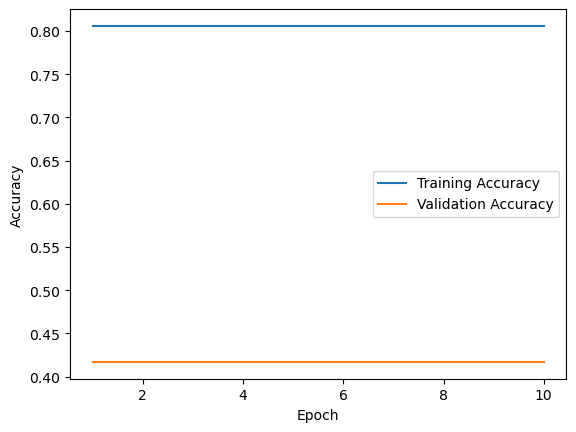

In [137]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store training and validation accuracy
train_accuracy_list = []
val_accuracy_list = []

# Loop over epochs
for epoch in tqdm(range(1, epochs + 1)):
    model.train()
    
    loss_train_total = 0
    
    progress_bar = tqdm(dataloader_train, desc="Epoch: {:1d}".format(epoch), leave=False, disable=False)

    for batch in progress_bar:
        model.zero_grad()
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {
            "input_ids": batch[0],
            "attention_mask": batch[1],
            "labels": batch[2]
        }
        
        outputs = model(**inputs)
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()
        
        torch.nn.utils.clip_grad_norm(model.parameters(), 1.0)
        
        optimizer.step()
        scheduler.step()

        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item() / len(batch))})

    # Calculate training accuracy and store it
    train_accuracy = calculate_accuracy(model, dataloader_train)
    train_accuracy_list.append(train_accuracy)

    # Calculate validation accuracy and store it
    val_loss, predictions, true_vals = evaluate(dataloader_test)
    val_accuracy = f1_score_func(predictions, true_vals)
    val_accuracy_list.append(val_accuracy)

    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total / len(dataloader_train)
    tqdm.write(f'Training Loss: {loss_train_avg}')
    tqdm.write(f'Validation Loss: {val_loss}\nValidation Score: {val_accuracy}')

# Plotting the accuracy
epochs_list = np.arange(1, epochs + 1)
plt.plot(epochs_list, train_accuracy_list, label='Training Accuracy')
plt.plot(epochs_list, val_accuracy_list, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Using the saved model


In [68]:
from transformers import BertForSequenceClassification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',
                                     num_labels = len(dict_label),
                                     output_attentions = False,
                                     output_hidden_states =  False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [69]:
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [70]:
from sklearn.metrics import confusion_matrix

def evaluate(dataloader_val):
    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in tqdm(dataloader_val):
        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2]
                  }
        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total / len(dataloader_val)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    # Convert logits to predicted labels
    predicted_labels = np.argmax(predictions, axis=1)

    # Compute confusion matrix
    confusion_mat = confusion_matrix(true_vals, predicted_labels)

    return loss_val_avg, predictions, true_vals, confusion_mat


In [71]:
_,predictions,true_vals,conf = evaluate(dataloader_test)

  0%|          | 0/43 [00:00<?, ?it/s]

In [74]:
accuracy_per_class(predictions,true_vals)

Class:{0: 'disgust', 1: 'contempt', 2: 'anger', 3: 'neutral', 4: 'joy', 5: 'sadness', 6: 'fear', 7: 'surprise'}
Accuracy:0/21

Class:{0: 'disgust', 1: 'contempt', 2: 'anger', 3: 'neutral', 4: 'joy', 5: 'sadness', 6: 'fear', 7: 'surprise'}
Accuracy:0/74

Class:{0: 'disgust', 1: 'contempt', 2: 'anger', 3: 'neutral', 4: 'joy', 5: 'sadness', 6: 'fear', 7: 'surprise'}
Accuracy:0/118

Class:{0: 'disgust', 1: 'contempt', 2: 'anger', 3: 'neutral', 4: 'joy', 5: 'sadness', 6: 'fear', 7: 'surprise'}
Accuracy:0/633

Class:{0: 'disgust', 1: 'contempt', 2: 'anger', 3: 'neutral', 4: 'joy', 5: 'sadness', 6: 'fear', 7: 'surprise'}
Accuracy:225/228

Class:{0: 'disgust', 1: 'contempt', 2: 'anger', 3: 'neutral', 4: 'joy', 5: 'sadness', 6: 'fear', 7: 'surprise'}
Accuracy:0/126

Class:{0: 'disgust', 1: 'contempt', 2: 'anger', 3: 'neutral', 4: 'joy', 5: 'sadness', 6: 'fear', 7: 'surprise'}
Accuracy:0/88

Class:{0: 'disgust', 1: 'contempt', 2: 'anger', 3: 'neutral', 4: 'joy', 5: 'sadness', 6: 'fear', 7: 'surp

In [142]:
21+74+118+633+228+126+88+66

1354

In [72]:
conf

array([[  0,   0,   0,   0,  21,   0,   0,   0],
       [  0,   0,   0,   0,  74,   0,   0,   0],
       [  4,   0,   0,   0, 114,   0,   0,   0],
       [  4,   0,   0,   0, 629,   0,   0,   0],
       [  3,   0,   0,   0, 225,   0,   0,   0],
       [  1,   0,   0,   0, 125,   0,   0,   0],
       [  0,   0,   0,   0,  88,   0,   0,   0],
       [  0,   0,   0,   0,  66,   0,   0,   0]])

In [76]:
import seaborn as sns

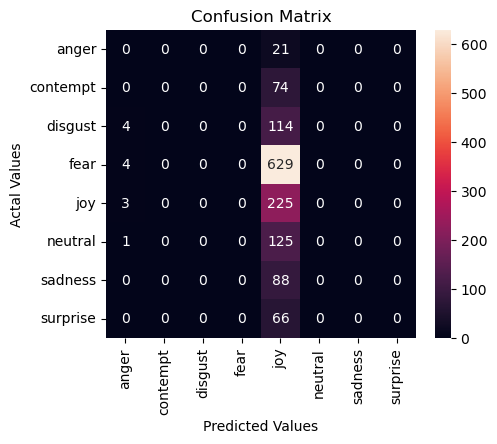

In [77]:
cm_df = pd.DataFrame(conf,
                     index = ['anger','contempt','disgust',"fear","joy","neutral","sadness","surprise"], 
                     columns = ['anger','contempt','disgust',"fear","joy","neutral","sadness","surprise"])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()